# Esercitazione 8

# Tecniche MonteCarlo Variazionali Quantistiche

In questa esercitazione ci si propone di sfruttare il principio variazionale della meccanica quantistica, che afferma che
$$
E_T=\frac{\langle \psi_T|\hat{H}|\psi_T\rangle}{\langle \psi_T|\psi_T\rangle}\geq\frac{\langle \psi_0|\hat{H}|\psi_0\rangle}{\langle \psi_0|\psi_0\rangle}=E_0
$$
per trovare l'autostato fondamentale approssimato di una data Hamiltoniana.

Per avere una stima dell'autovalore di energia $E_T$ bisogna calcolare un integrale multidimensionale:
$$
E_T = \frac{\int\vec{dr_1}\dots\vec{dr_N}\psi^*_T(\vec{r_1}\dots\vec{r_N})\hat{H}\psi_T(\vec{r_1}\dots\vec{r_N})}{\int\vec{dr_1}\dots\vec{dr_N}|\psi_T(\vec{r_1}\dots\vec{r_N})|^2} = \int\vec{dr_1}\dots\vec{dr_N} \frac{|\psi_T|^2}{\int\vec{dr_1}\dots\vec{dr_N}|\psi_T|^2}\frac{\hat{H}\psi_T}{\psi_T}
$$
dove nella seconda scrittura si può interpretare la prima frazione come una densità di probabilità e il secondo termine come funzione integranda. A questo punto è molto utile sfruttare l'algoritmo di Metropolis per campionare tale densità di probabilità, la cui normalizzazione è sconosciuta. Proponendo una funzione d'onda di prova che dipende da una serie di parametri, si può calcolare questo integrale al variare dei parametri e studiare quali sono quelli che minimizzano il valor medio dell'operatore Hamiltoniana. Per il principio variazionale, la $\psi_T$ con i parametri che minimizzano $E_T$ dovrebbe essere un'approssimazione ragionevole della funzione d'onda dello stato fondamentale del problema.

### Potenziale a doppia buca

Ci si propone di studiare un potenziale a doppia buca: $V(x) = x^4-\frac{5}{2}x^2$. Consideriamo come funzione di prova una funzione d'onda in cui si sovrappongano simmetricamente rispetto all'origine due gaussiane, parametrizzandone la larghezza $\sigma$ e il punto su cui sono centrate $\pm \mu$:
$$
\Psi_T^{\sigma,\mu}(x) \propto (e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}})
$$

#### Implementazione
Per affrontare il problema sono state sviluppate alcune classi:
- La classe **Metropolis1D**, che permette di campionare una data distribuzione di probabilità passata come argomento del costruttore nella forma di un oggetto **FunzioneBase**, insieme a un punto di partenza per il random walk associato e ad un valore d'inizializzazione per $\delta$. E' dotata di metodi per campionare la distribuzione data con distribuzioni proposte uniforme e gaussiana, e per ciascuna di queste due opzioni esistono metodi per calcolare l'accettazione media e per impostare automaticamente un valore di $\delta$ che garantisca un'accettazione $\simeq 50\%$. Questi metodi sono applicati per ogni nuova coppia di $\mu$, $\sigma$.
- Una serie di classi figlie di **FunzioneBase**, che rappresenta generiche funzioni analitiche reali di variabile reale. Si ha una classe che rappresenta la $\psi_T^{\sigma,\mu}$ proposta (da cui si ottiene $|\psi_T^{\sigma,\mu}|^2$ con la classe **Prodotto**, che permette di moltiplicare funzioni tra loro) e una classe analoga per la sua derivata seconda. L'altro oggetto interessante è **HEvaluator**, che rappresenta il termine $H\psi_T(x)/\psi_T(x) + V(x)=\psi_T''(x)/2\psi_T(x)+V(x)$. $\psi_T$, $\psi_T''$ e $V$ sono a loro volta oggetti **FunzioneBase** che vengono passate tramite il costruttore della classe. Questo tipo di architettura dovrebbe rendere la classe versatile e riutilizzabile per problemi diversi.

Il programma calcola l'integrale con il metodo della media Montecarlo e con valori di $\sigma$, $\mu$ che variano su una griglia 25$\times$25. Tra una casella e l'altra della griglia i parametri variano di $\Delta\mu=\Delta\sigma=0.04$ ($\mu\in[0.5,1.5]$, $\sigma\in[0.2,1.2]$). Individuata la coppia che minimizza $E_T$, procede ad effettuare calcoli con la funzione d'onda dello stato fondamentale approssimata.

## Risultati

I risultati della ricerca dei parametri che ottimizzano il problema sono rappresentati nell'immagine sottostante. La parte più scura di grafico corrisponde a quei parametri di $\sigma,\mu$ per cui $E_T$ è minore. Si nota che nella parte in centro/in basso i valori dell'hamiltoniana sono stabilmente bassi. E' in questa zona che si trovano i parametri che ottimizzano il problema.

In tutta l'esercitazione abbiamo utilizzato una probabilità di transizione $T(x|y)$ uniforme e fissato $\hbar=1$, $m=1$.

<IPython.core.display.Javascript object>


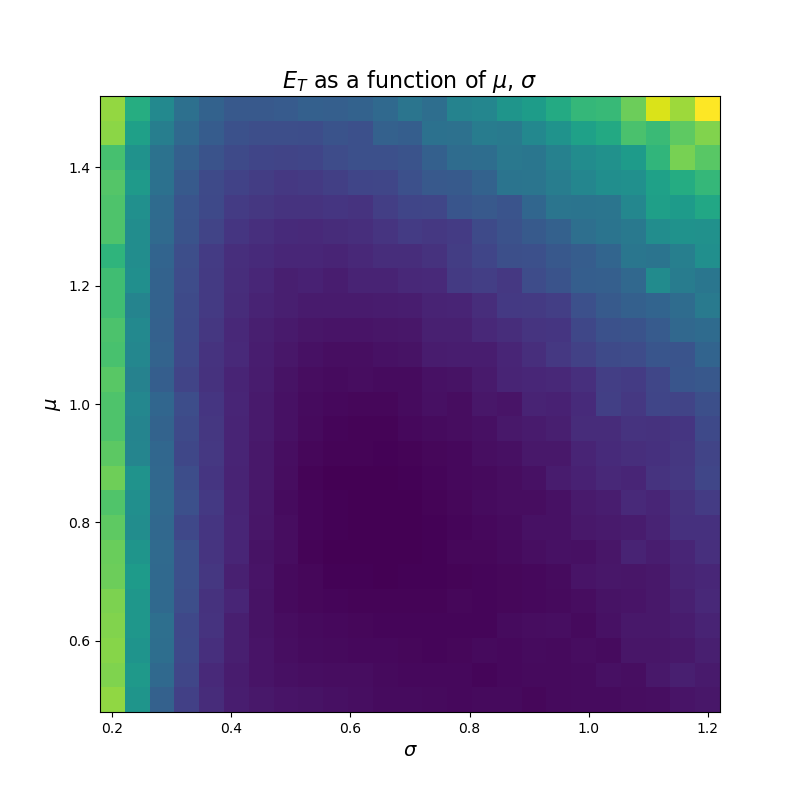

<IPython.core.display.Javascript object>


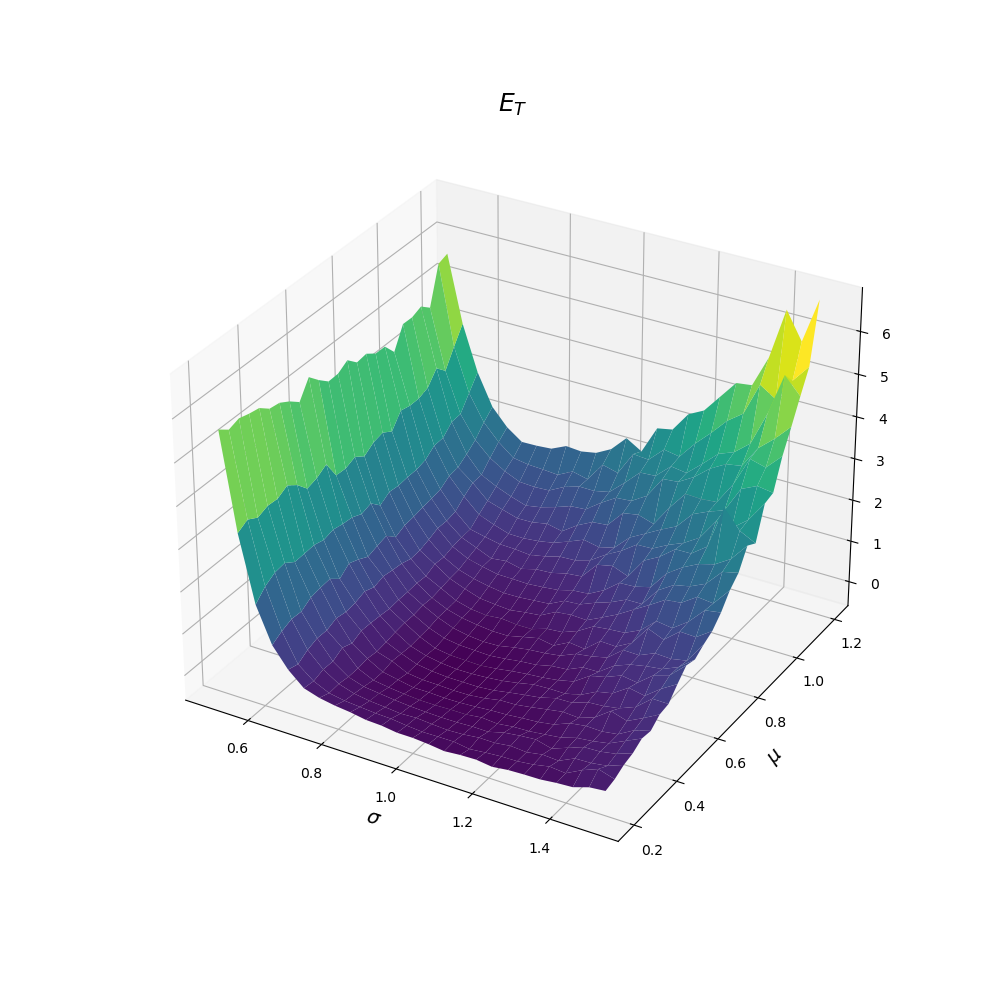

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

matr = np.loadtxt('output/matrix.dat')
steps = matr[0].size
mu = np.linspace(0.5,1.5,steps)
sigma = np.linspace(0.2,1.2,steps)

M, S = np.meshgrid(mu,sigma)

plt.figure(figsize=(8,8))
plt.pcolormesh(sigma,mu,matr,shading='auto')
plt.xlabel('$\sigma$',fontsize=14)
plt.ylabel('$\mu$',fontsize=14)
plt.title('$E_T$ as a function of $\mu$, $\sigma$',fontsize=16)

plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(M, S, matr,cmap='viridis', edgecolor='none')
ax.set_title('$ E_T $',fontsize=18)
ax.set_xlabel('$\sigma$',fontsize=14)
ax.set_ylabel('$\mu$',fontsize=14)


plt.show()

I parametri che, in definitiva, minimizzano la funzione d'onda sono $\sigma = 0.60$, $\mu = 0.82$

### Stima energia dello stato fondamentale
Riportiamo i dati ottenuti per $\langle H \rangle$ nello stato fondamentale approssimato, divisi in $100$ blocchi da $10^3$ valori ciascuno.

Estimate for energy in the fundamental state:  -0.438091 +- 0.00306426


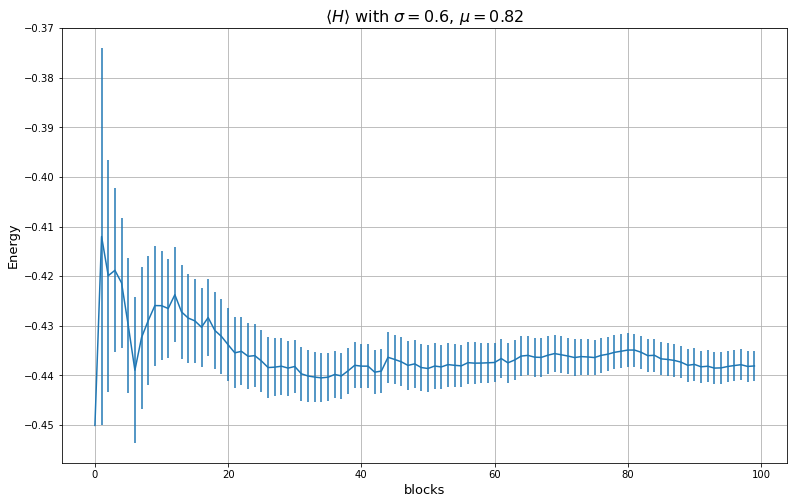

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

H, err = np.loadtxt('output/blocks.dat',usecols=(0,1),unpack=True)
blocks = np.arange(H.size)

plt.figure(figsize=(13,8))
plt.errorbar(blocks,H,err)
plt.grid(True)
plt.title(r'$\langle H \rangle $ with $\sigma = 0.6$, $\mu = 0.82$',fontsize=16)
plt.xlabel('blocks',fontsize=13)
plt.ylabel('Energy',fontsize=13)

print('Estimate for energy in the fundamental state: ',H[H.size-1],'+-',err[err.size-1])
#print('Energy with numerical method: ',E[0])

### Confronto funzione d'onda

In [3]:
def pot(x):
    return x**4-5./2.*x**2

hbar = 1
m = 1     
a = 6.    #grid length
N = 1000  #iterations

x = np.linspace(-a/2.,a/2.,N)
dx = x[1]-x[0]
V = pot(x)

#build the matrix representing Schrodinger's eq
CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

#now psi[0] is the ground state (approximate) wavefunction and E[0] it's energy
print('ground state energy:',E[0])

ground state energy: -0.46045845079911807


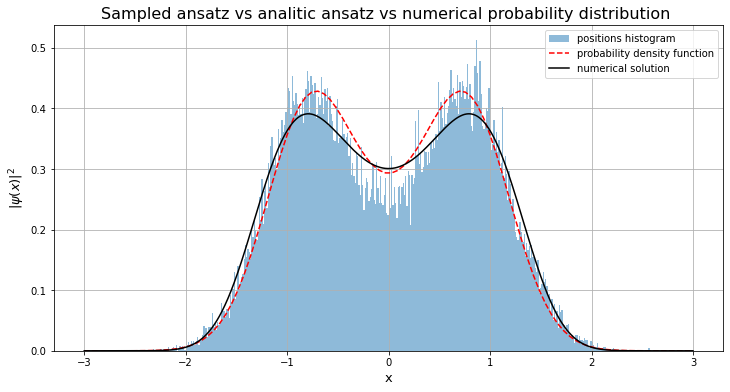

In [4]:

import math
from scipy.optimize import curve_fit

def psiModel(x,sigma,mu):
    N = np.sqrt(2*sigma*np.sqrt(math.pi)*(1+np.exp(-(mu/sigma)**2)))
    return (np.exp(-(((x-mu)/sigma)**2)/2) + np.exp(-(((x+mu)/sigma)**2)/2))/N

psi2 = np.loadtxt('output/psi2pdf.dat')
mu = 0.78
sigma = 0.6
rng = np.linspace(-3.,3.,100)
model = psiModel(rng,sigma, mu)*psiModel(rng,sigma, mu)

Nbins = 400
plt.figure(figsize = (12,6))
plt.hist(psi2,density=True,alpha=0.5,bins=Nbins,label='positions histogram')
plt.title('Sampled ansatz vs analitic ansatz vs numerical probability distribution ',fontsize=16)
plt.xlabel('x',fontsize=13)
plt.ylabel('$| \psi(x)|^2$',fontsize=13)
plt.plot(rng,model,'r--',linewidth=1.5,label='probability density function')
plt.plot(x,psi[0]*psi[0],'k',label='numerical solution',linewidth=1.5)
plt.grid(True)
plt.legend()

plt.show()


In figura si possono osservare la curva della funzione d'onda con i parametri ottimizzati con le tecniche variazionali quantistiche Montecarlo, la curva ottenuta scrivendo l'equazione di Schrodinger in forma matriciale e un istogramma delle posizioni campionate con l'algoritmo di Metropolis. Si nota che il risultato ottenuto con Metropolis è piuttosto fedele alla $\psi_T$, ma che questa si discosta (in maniera comunque contenuta) dalla soluzione numerica.

## Appendice

#### Acceptance - delta scatterplot
Abbiamo provato a dare una valutazione del metodo che imposta automaticamente un valore di $\delta$ calcolando l'accettazione nei diversi casi corrispondenti alle varie $\mu$, $\sigma$. Il risultato è rappresentato nello scatterplot in figura: i valori di accettazione sono compresi nella maggior parte dei casi tra $50\%$ e $55\%$.

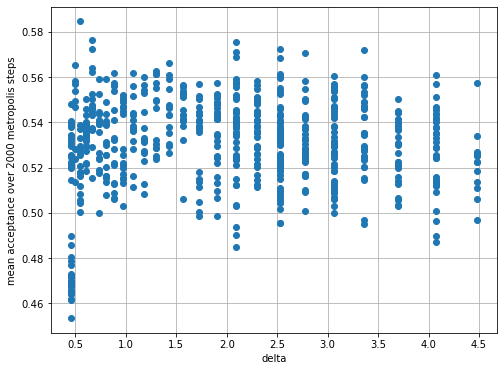

In [5]:
acc, delta = np.loadtxt('output/acceptance.dat',unpack=True)

plt.figure(figsize=(8,6))
plt.plot(delta,acc,'o')
plt.xlabel('delta')
plt.ylabel('mean acceptance over 2000 metropolis steps')
plt.grid(True)

plt.show()